Scaling & Transformations

Scaling, Standardizing and Transformations are some of the important steps of numeric feature engineering. Machine Learning & Deep Learning algorithams are highly data quality dependent. If Data quality is not good even high performance algorithms are of no use, its as simple as Garbage In : Garbage Out. 

But despite of that, we see that oftenly Data Analysts and even experienced data scientists are confused around a good understanding of these terms. Some of the questions around them are, what are these well known but less understood terms and when to use which one? We should use them with which algorithms? 



In [1]:
from imblearn.over_sampling import SMOTE

/Users/shamanu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.getcwd()

'/Users/shamanu/Documents/bash/medium'

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing



Following datafile is taken from Home Credit Default Risk. Data is collated around to predict clients' repayment abilities. Following Data is for all applications, One row represents one loan in our data sample.
 

Following dataset explains how capabale each applicant is of repaying a loan ? Loaded file is a main data file. Obviously using additional data is necessary to improve score. But for this exercise we are using just the main data file.

DataSet can be downloaded from: - [Data](https://www.kaggle.com/c/home-credit-default-risk/data)

In [4]:
a = pd.read_csv('/Users/shamanu/Documents/bash/Data_Science/data/application_train.csv')
#a = pd.read_csv('/Users/shamanu/Documents/bash/Data_Science/data/hotel_bookings.csv')



print('Shape of the Data {}'.format(a.shape))
a.head()

Shape of the Data (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
list(a.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

Some of the important explanatory features are 

1. AMT_INCOME_TOTAL 
2. AMT_CREDIT 
3. age 
4. DAYS_EMPLOYED 
5. OWN_CAR_AGE 
6. AMT_GOODS_PRICE 
7. AMT_ANNUITY

In [6]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'OWN_CAR_AGE', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']

# cols = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
#                 "stays_in_weekend_nights","stays_in_week_nights","adults","children",
#                 "babies", 
#                 "agent","company",
#                 "required_car_parking_spaces", "total_of_special_requests", "adr"]




response= ['TARGET']
#response= ['is_canceled']

In [8]:
a['DAYS_BIRTH']= a['DAYS_BIRTH'] / -365

In Real Life Work, we mostly see skewed kind of numeric distribution

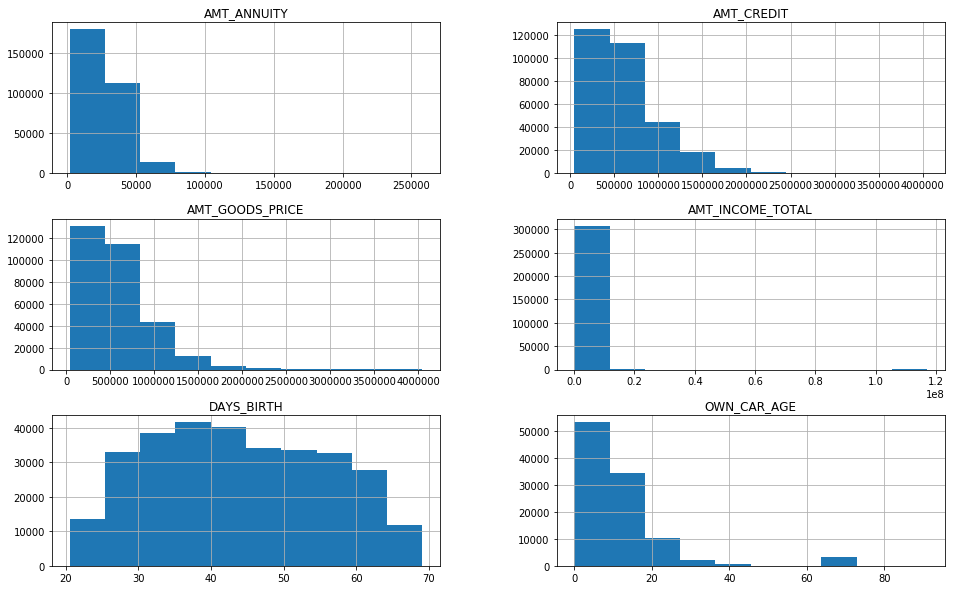

In [9]:
a[cols].hist(figsize = (16, 10));

And our target Feature distribution is like 

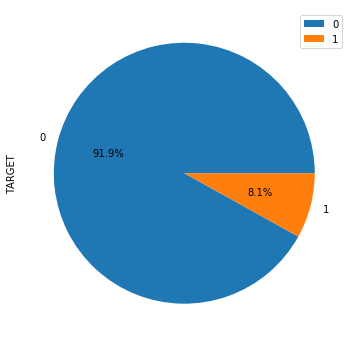

In [10]:
a['TARGET'].value_counts().plot.pie(legend= True, figsize = (16,6), autopct = '%1.1f%%');

Histogram is a good way to start with numeric features, it explains a lot around numeric features 

Two important things to note before we proceed 

1. Almost all the features are skewed at first glance except days of birth.
2. Features has totally different ranges

In [11]:
df = a[cols]
#df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH']/365)
df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,OWN_CAR_AGE,AMT_GOODS_PRICE,AMT_ANNUITY
0,202500.0,406597.5,25.920548,NaN,351000.0,24700.5
1,270000.0,1293502.5,45.931507,NaN,1129500.0,35698.5
2,67500.0,135000.0,52.180822,26.0,135000.0,6750.0
3,135000.0,312682.5,52.068493,NaN,297000.0,29686.5
4,121500.0,513000.0,54.608219,NaN,513000.0,21865.5


In [12]:
df.isnull().sum()

AMT_INCOME_TOTAL         0
AMT_CREDIT               0
DAYS_BIRTH               0
OWN_CAR_AGE         202929
AMT_GOODS_PRICE        278
AMT_ANNUITY             12
dtype: int64

In [13]:
df.fillna(0, inplace = True)

/Users/shamanu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [14]:
df.dropna(inplace = True)

/Users/shamanu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


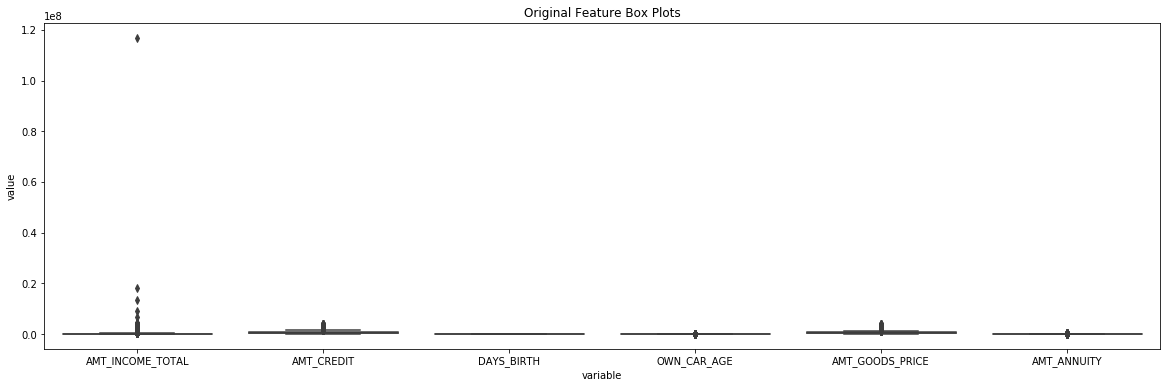

In [15]:
plt.figure(figsize = (20,6));
sns.boxplot(x = 'variable', y = 'value',data =df.melt()).set_title('Original Feature Box Plots');

In [137]:
df.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,OWN_CAR_AGE,AMT_GOODS_PRICE,AMT_ANNUITY
count,3.075110e+05,3.075110e+05,307511.000000,104582.000000,3.072330e+05,307499.000000
mean,1.687979e+05,5.990260e+05,43.936973,12.061091,5.383962e+05,27108.573909
std,2.371231e+05,4.024908e+05,11.956133,11.944812,3.694465e+05,14493.737315
min,2.565000e+04,4.500000e+04,20.517808,0.000000,4.050000e+04,1615.500000
25%,1.125000e+05,2.700000e+05,34.008219,5.000000,2.385000e+05,16524.000000
50%,1.471500e+05,5.135310e+05,43.150685,9.000000,4.500000e+05,24903.000000
75%,2.025000e+05,8.086500e+05,53.923288,15.000000,6.795000e+05,34596.000000
max,1.170000e+08,4.050000e+06,69.120548,91.000000,4.050000e+06,258025.500000


When Transformation is required on Numeric features?

Transformations are important when our numeric features is skewed, Skewness can be beacuse of two reasons

Either because of extreme outliers, which may or may not be important to us.
Or Its natural distribution of your data at that level, this is a case helpsappens in most of real levelife cases


Normality is an assumption in almost all of Statistical algorithms. Thats why its good to transform the numeric feature
Square Root/ Cube Root
Logarithms 
Not just that transformation sometime helps us to understand the relationship better, not in every case, 

Effects of Transformation: If our response feature is skewed, after log transformation, it will give equal importance to all the samples as its normally distributed now, its also called homoscedasticty

If our dependednt feature is skewed then log transformation can help to be normally distributed and all the alogorithms can benefit from it

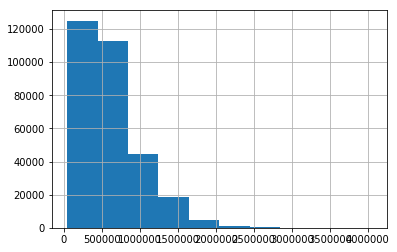

In [90]:
df['AMT_CREDIT'].hist();

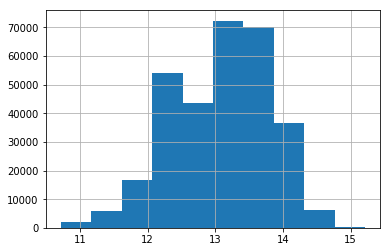

In [91]:
np.log(a['AMT_CREDIT']+1).hist();

Especially During Scaling/ Standardizing/ Normalizing, we will follow sklearn vocabulary and will save us from using these names interchangeability as it create more confusion. 

Scaling- It rescale your data and it's used when we want features to be compared on same scale for our algorithm

Sklearn has following four scalers primarily

1. Minmax scaling
2. Robust scalingcaler
3. Standard Scaler
4. Normalizer

Why Scaling/ transformations? Becasue they help algorithams to understand the data relationship better 


When Scaling is required? 
This is important when using distance based algorithms

1. Linear & Logistic Regression
2. KMeans/ KNN
3. Neural Networks

And even other techniques like PCA. But Following is independent of Scaling, as these tecniques doesnt compare the features

When Scaling is not required?
1. Tree Based Algorithams
Decision Tree, Random Forest, Boosted Trees



In [16]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = pd.DataFrame(mm_scaler.fit_transform(df), columns = cols)

df_mm.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,OWN_CAR_AGE,AMT_GOODS_PRICE,AMT_ANNUITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.001224,0.138334,0.481849,0.045076,0.132817,0.105058
std,0.002027,0.100497,0.245997,0.099006,0.091268,0.056174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000742,0.056180,0.277565,0.000000,0.058889,0.064040
50%,0.001039,0.116987,0.465671,0.000000,0.111111,0.096514
75%,0.001512,0.190674,0.687317,0.054945,0.167778,0.134080
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


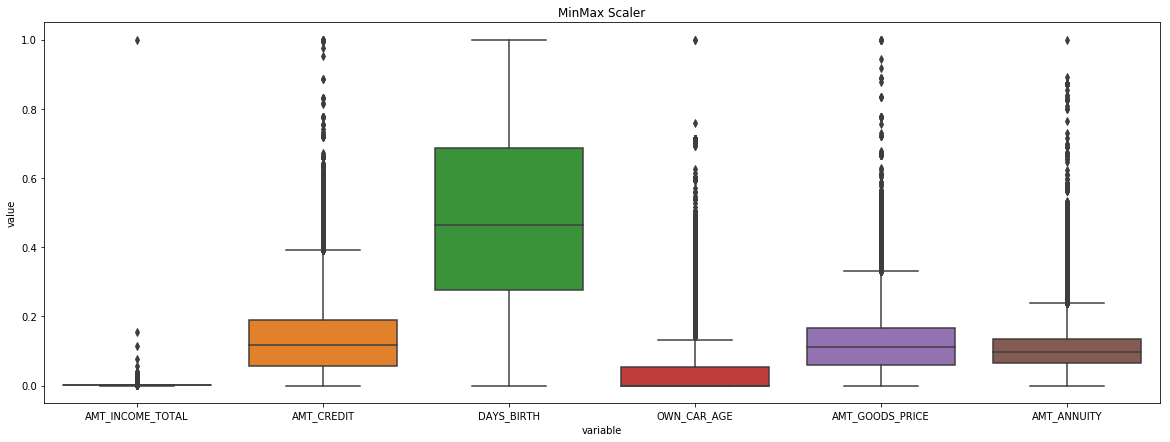

In [17]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value',data =df_mm.melt()).set_title('MinMax Scaler');

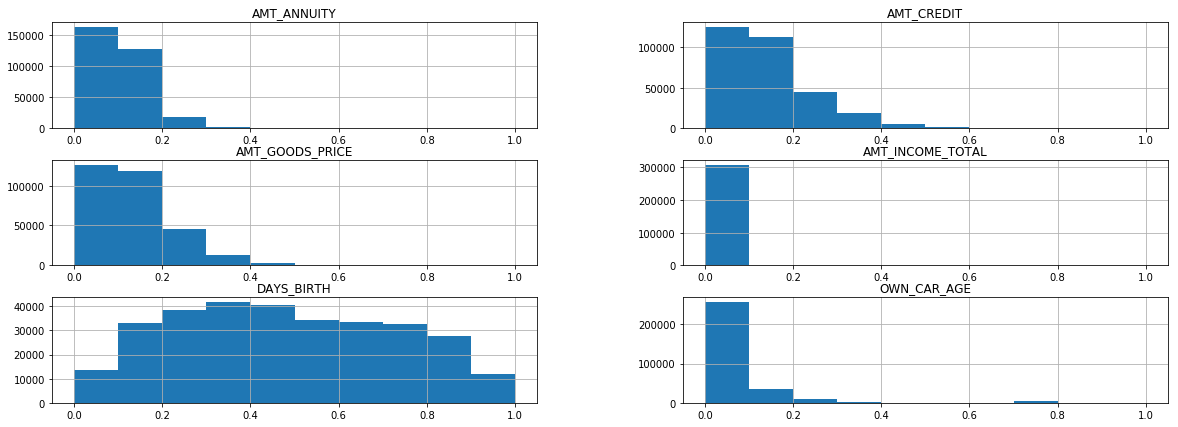

In [18]:
df_mm.hist(figsize = (20, 7));

minmax scaler should be the first choice, as it doesnt change the distribution of the feature and at a same time they all become comparable to each other, they all come in one scale altogether

Robust Scaler, is used when your data has high outliers and we wantt to subside their effects. But if thats the case its better to exclude those outliers in the modelling process itself. RobustScaler subtracts the column median and divides by the interquartile range. It may change some 

In [19]:
r_scaler = preprocessing.RobustScaler()
df_r = pd.DataFrame(r_scaler.fit_transform(df), columns = cols)

df_r.describe()


,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,OWN_CAR_AGE,AMT_GOODS_PRICE,AMT_ANNUITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.240532,0.158721,0.039482,0.820376,0.199341,0.121985
std,2.634702,0.747221,0.600356,1.801903,0.838172,0.802039
min,-1.350000,-0.869825,-1.136470,0.000000,-1.020408,-1.377988
25%,-0.385000,-0.452114,-0.459073,0.000000,-0.479592,-0.463645
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.615000,0.547886,0.540927,1.000000,0.520408,0.536355
max,1298.365000,6.565430,1.304031,18.200000,8.163265,12.899651


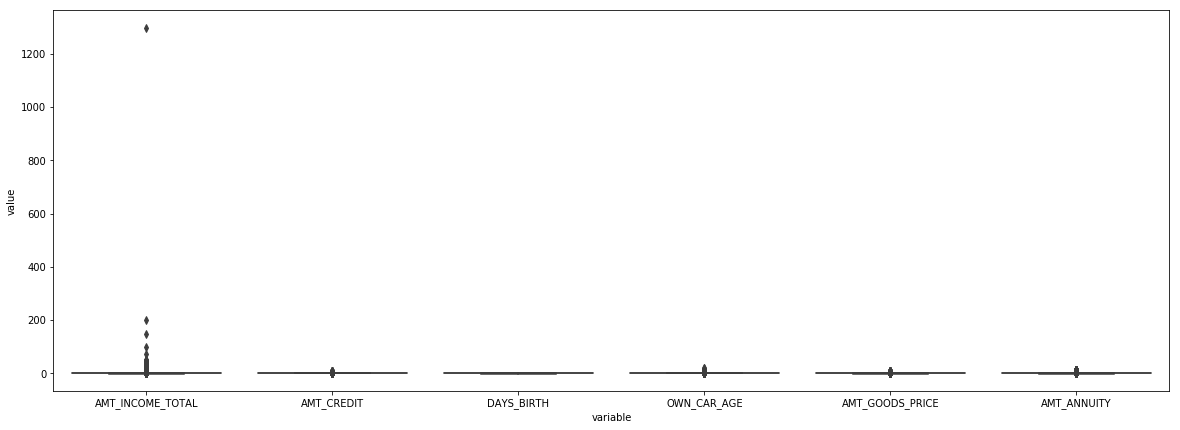

In [20]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value',data =df_r.melt());

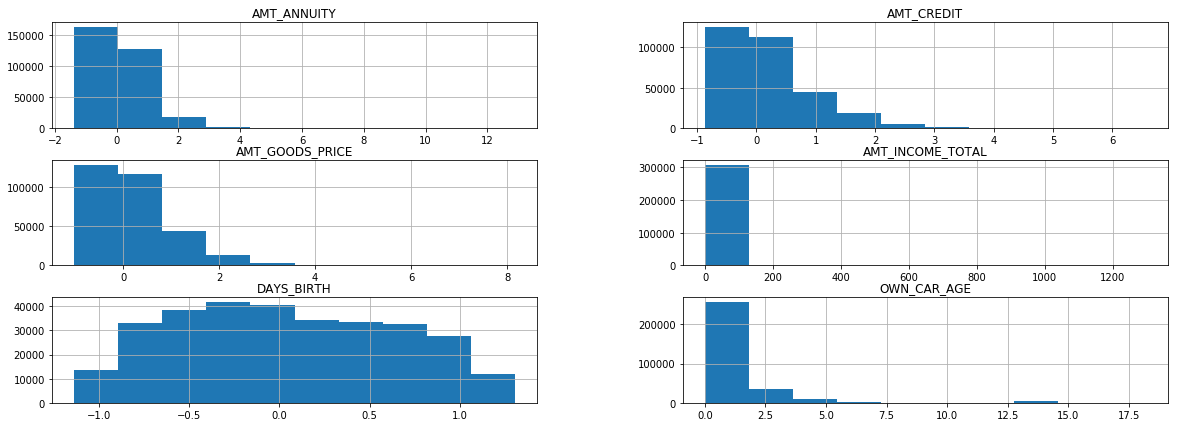

In [21]:
df_r.hist(figsize = (20, 7));

Standard Scaler make our standard deviation equal to 1, it changes the inherent distribution sometimes and also it assumes the feature is normally distributed. StandardScaler is scales each column to have 0 mean and unit variance.

In [22]:
s_scaler = preprocessing.StandardScaler()
df_s = pd.DataFrame(s_scaler.fit_transform(df), columns=cols)
df_s.describe()



,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,OWN_CAR_AGE,AMT_GOODS_PRICE,AMT_ANNUITY
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05
mean,7.880806e-16,-9.238467e-17,-7.033836e-16,1.177354e-16,1.051149e-16,-5.986469e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-6.036870e-01,-1.376496e+00,-1.958761e+00,-4.552838e-01,-1.455252e+00,-1.870204e+00
25%,-2.374210e-01,-8.174760e-01,-8.304332e-01,-4.552838e-01,-8.100179e-01,-7.301786e-01
50%,-9.129414e-02,-2.124151e-01,-6.576450e-02,-4.552838e-01,-2.378290e-01,-1.520941e-01
75%,1.421293e-01,5.208178e-01,8.352476e-01,9.968598e-02,3.830569e-01,5.166460e-01
max,4.927034e+02,8.574059e+00,2.106335e+00,9.645167e+00,9.501557e+00,1.593151e+01


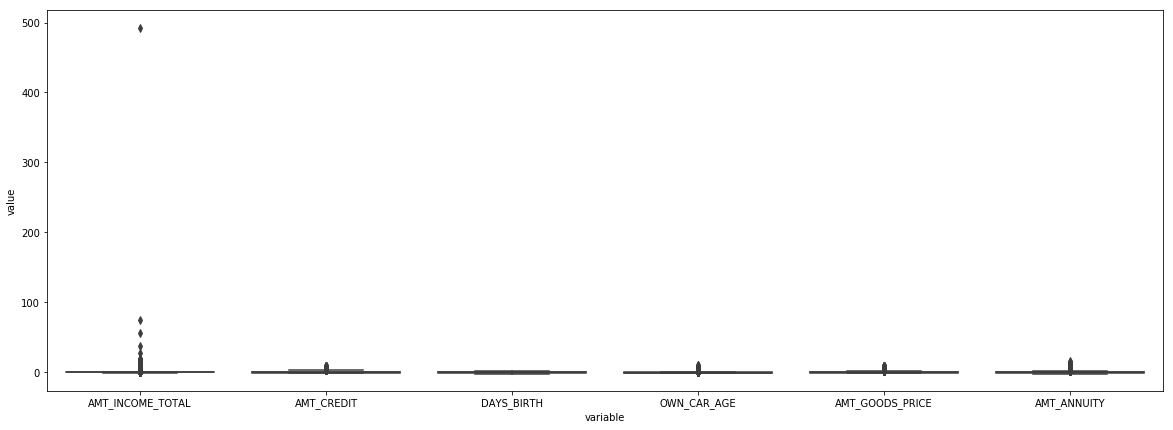

In [23]:
plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value',data =df_s.melt());

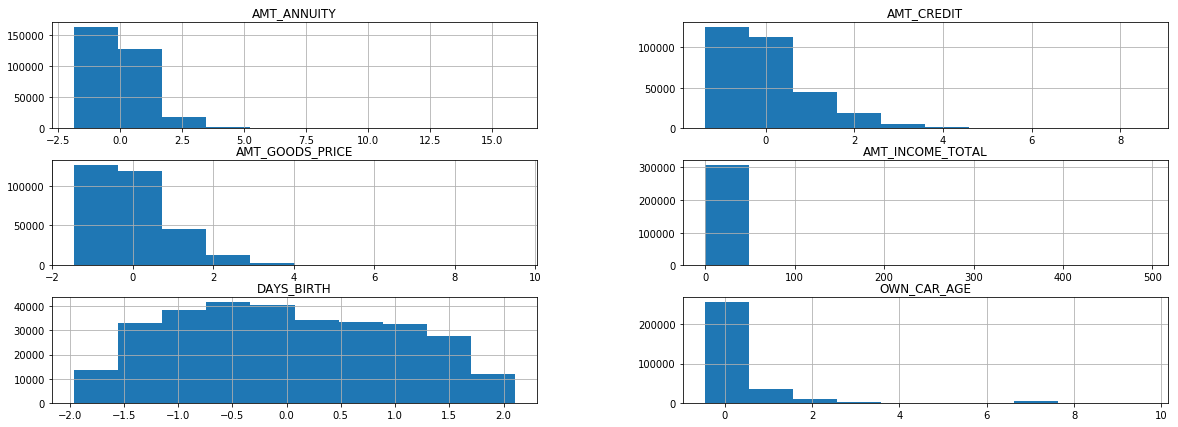

In [24]:
df_s.hist(figsize = (20,7));

Normalizer is for rows, so sklearn users save yourself for using the word and scaler normalized, it can be used in cases when we are comparing multiple timeseries at same time, i.e. storck movements of multiple stocks

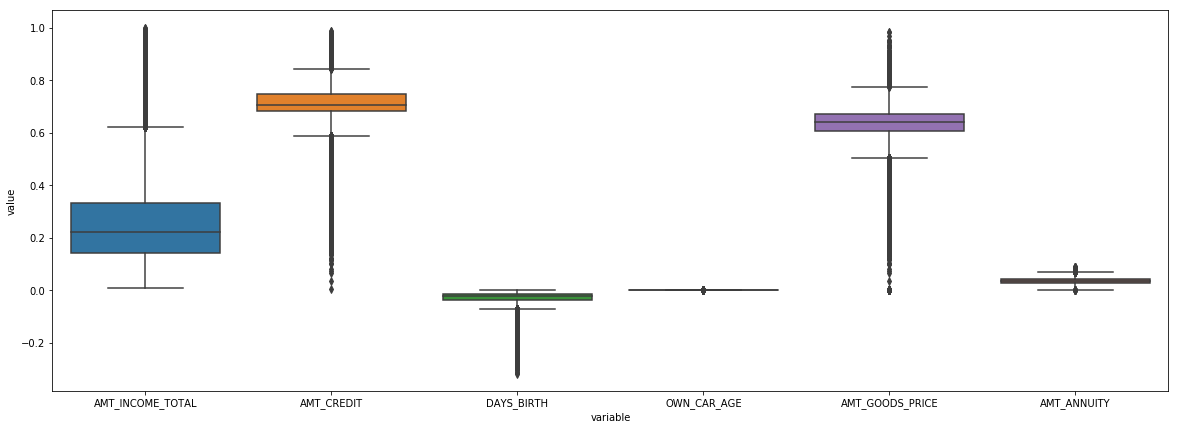

In [54]:
n_scaler = preprocessing.Normalizer()
df_n = pd.DataFrame(n_scaler.fit_transform(df.fillna(0)), columns = cols)

plt.figure(figsize = (20,7))
sns.boxplot(x = 'variable', y = 'value',data =df_n.melt());

Also, dont forget to use the same scaler model which we fit on the train data and then transform our test set from same fitted model. Never fit your scaler again on the new data

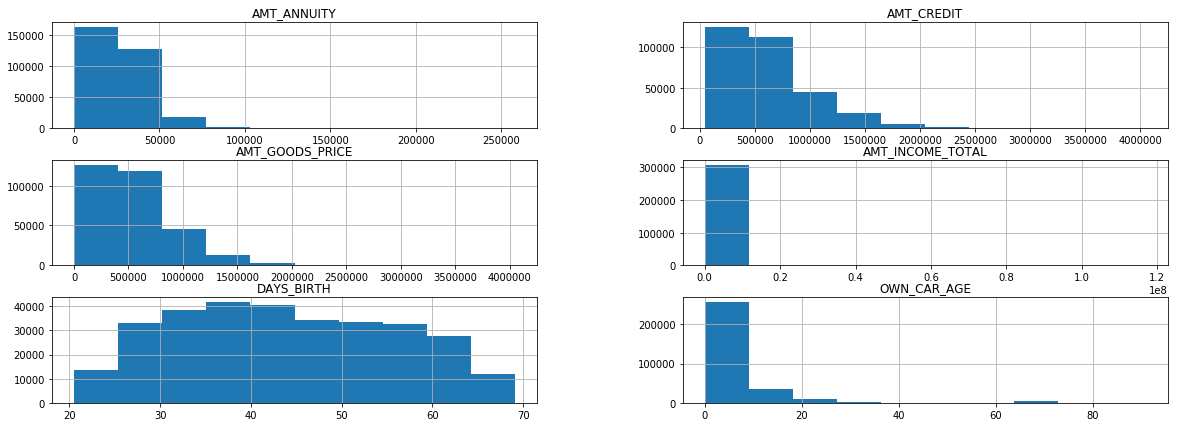

In [15]:
df.hist(figsize =(20,7));

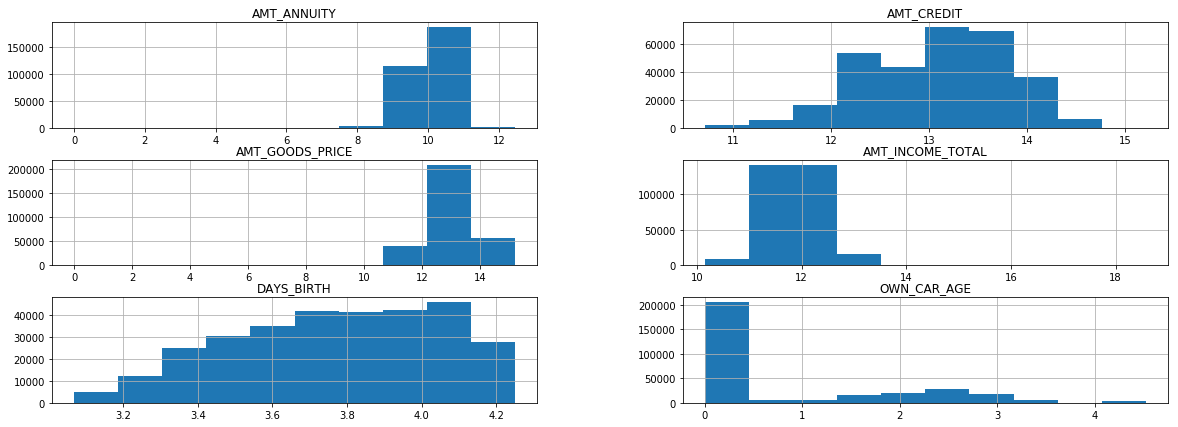

In [16]:
np.log(df +1).hist(figsize =(20,7));

Why bec if we will look at log transformation, its. output is higher for low values and ane very low for hig values. So log transformation of predictor features may or may not improve the modelling relationship

In [224]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, \
                           precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score

#df
#df_mm
#df_r
#np.log(df+1)



dt = df_r



X = dt
y = a['TARGET']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

print("train set shape: {}".format(X_train.shape))
print("test set shape: {}".format(X_test.shape))

train set shape: (215257, 6)
test set shape: (92254, 6)


In [225]:
smt = SMOTE(random_state=100)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [226]:
y_test.value_counts()

0    84743
1     7511
Name: TARGET, dtype: int64

In [227]:
logreg = LogisticRegression(random_state = 100)
print(logreg.fit(X_train, y_train))

print("logistic train accuracy :", logreg.score(X_train, y_train))
print("logistic test accuracy :", logreg.score(X_test, y_test))
y_pred = logreg.predict(X_test)

/Users/shamanu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logistic train accuracy : 0.5862091612231805
logistic test accuracy : 0.5619160144817569


In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.56      0.70     84743
           1       0.11      0.61      0.18      7511

    accuracy                           0.56     92254
   macro avg       0.53      0.58      0.44     92254
weighted avg       0.87      0.56      0.66     92254



In [229]:
roc_auc_score(y_test, y_pred)

0.5836020193680495

In [230]:
params = {'n_estimators': 500,'learning_rate': 0.01, 'loss': 'deviance', 'random_state': 100,'subsample':0.9}

gbm = GradientBoostingClassifier(**params)



print(gbm.fit(X_train, y_train))


print("Regression train accuracy :", gbm.score(X_train, y_train))
print("Regression test accuracy :", gbm.score(X_test, y_test))
y_pred = gbm.predict(X_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=100, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Regression train accuracy : 0.6677705197961029
Regression test accuracy : 0.6548550740347302


In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     84743
           1       0.12      0.50      0.19      7511

    accuracy                           0.65     92254
   macro avg       0.53      0.59      0.49     92254
weighted avg       0.87      0.65      0.73     92254



In [232]:
roc_auc_score(y_test, y_pred)

0.5858978721119302